## Making Light Cones
Once a simulation has been formatted and any desired properties have been added,
we can slice it into light cones, representing potential astrophysical fields to
be observed. The utilities in the ``simim.lightcone`` module accomplish this,
and are useful for creating mock observations and generating test data for
reduction pipelines.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
pltsty = {
    'font.size' : 18,

    # Axis appearance
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,

    # Legends
    'legend.frameon' : False,

    # Lines
    'lines.dashed_pattern' : [5,3],
}
rcParams.update(pltsty)

If you haven't already done the following steps while following previous
tutorials, the following code will download and format halo catalogs from the
TNG100-3-Dark simulation and add SFRs and CII luminosities.

[TNG100-3-Dark is a simulation box with 100 Mpc sides, a dark matter particle
mass of $4\times10^8$ $M_\odot$, and no Baryonic physics. We use this simulation
because the total data volume is relatively small (~3 GB compared to ~1 TB for
the full physics, full resolution TNG300-1 simulation). For most scientific
applications it is advisable to utilize a higher resolution simulation. However
the smaller, low-resolution TNG100-3 can be downloaded, formatted, and loaded
much more quickly, making it useful for demonstration and testing purposes.]

In [ ]:
import simim.siminterface as sim
from simim.galprops import prop_behroozi_sfr, prop_delooze_cii

api_key = '[fill in your API key here]' # Replace this with a string containing key
cat = sim.IllustrisCatalogs('TNG100-3-Dark',api_key)
cat.download_meta(redownload=False)
cat.download(redownload=False)
cat.format(remake=False)

rng = np.random.default_rng(58290)
tng100 = sim.SimHandler('TNG100-3-Dark')
tng100.make_property(prop_behroozi_sfr,other_kws={'rng':rng},write=True,overwrite=False)
rng = np.random.default_rng(85712)
tng100.make_property(prop_delooze_cii,other_kws={'rng':rng},rename='LCII',write=True,overwrite=False)

The first step to making a lightcone is to define its geometry - this entails an angle it subtends 
on the sky, a shape (box or circle are supported), and a redshift range covered. We will make a 
square lightcone of 1.0 degrees x 1.0 degrees covering redshifts 0 to 2.

This setup is handled by the ``simim.lightcone.LCMaker`` class:

In [10]:
from simim.lightcone import LCMaker

gen = LCMaker(sim='TNG100-3-Dark', 
              name="demo",
              openangle = 1.0,
              aspect = 1,
              mode = 'box',
              redshift_min = 0,
              redshift_max = 2,
              minimum_mass = 1e8)

A file for light cones of this name already exists.
Light cones already saved may be overwritten.


This code sets up a directory to save lightcones, and initializes all of the
parameters necessary to build them, however no lightcones have been produced
yet. To build lightcones we use the ``build_lightcones`` method. This will build
lightcones with minimal information about the positions of objects included
(angular position and redshift). We can then specify halo properties to include
with the ``add_properties`` method.

In [11]:
rng = np.random.default_rng(16398)
gen.build_lightcones(rng=rng)
gen.add_properties('sfr','LCII')

Generating lines of sight.
Creating files and adding metadata.


It is possible to build multiple lightcones, with the same redshift range, opening angle, and properties,
but sampling the parent simulation volume differently (e.g. with different origins and viewing angles).
This can be useful for exploring field to field variance:

In [ ]:
n_lightcones = 10
rng = np.random.default_rng(16398)
gen.build_lightcones(n_lightcones, rng=rng)
gen.add_properties('sfr','LCII')

The ``LCMaker`` does not restrict lightcones to contain less volume than their
parent simulations - arbitrary volumes can be filled by using multiple copies of
the parent volume. However, to check that a given lightcone geometry will fit
reasonably within a given simulation we can use the following code:

In [3]:
from simim.lightcone import LCHandler
lc1 = LCHandler('TNG100-3-Dark','demo',0)
V = lc1.volume()

import simim.siminterface as sim
tng100 = sim.SimHandler('TNG100-3-Dark')
n = tng100.number_volumes(V)

print(f"The number of lightcones we can fit in the TNG100 volume is {n:.1f}")

The number of lightcones we can fit in the TNG100 volume is 11.2


# Interacting with Lightcones

Once they are built, a separate handler object exists for visualizing and interacting with lightcones.
The ``simim.lightcon.LCHandler`` class operates analogously to the ``SnapHanlder`` class for simulation
snapshots. Many of the same methods used for exploring snapshots are useful here:

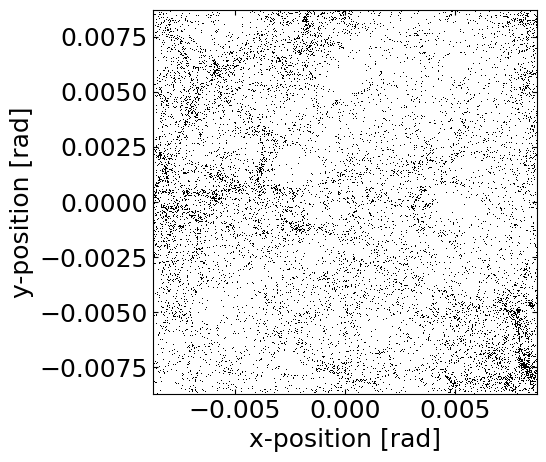

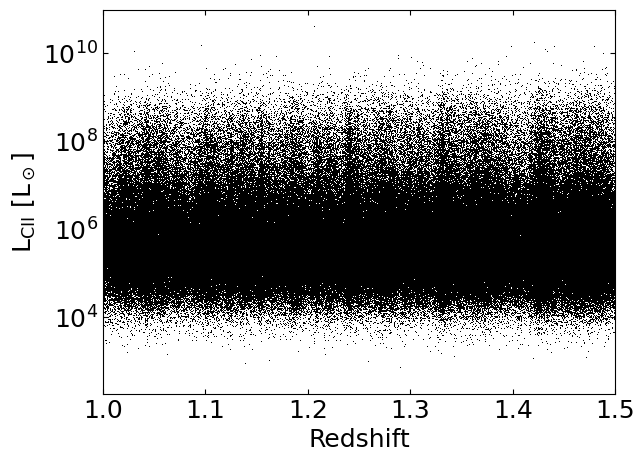

In [20]:
from simim.lightcone import LCHandler

lc1 = LCHandler('TNG100-3-Dark','demo',0)

lc1.set_property_range('redshift',0.99,1.01)
lc1.plot('ra','dec',
         axkws={'xlabel':'x-position [rad]','ylabel':'y-position [rad]','aspect':'equal','xlim':(-0.5*np.pi/180,0.5*np.pi/180),'ylim':(-0.5*np.pi/180,0.5*np.pi/180)},
         plotkws={'marker':',','color':'k'})

lc1.set_property_range()
lc1.plot('redshift','LCII',
         axkws={'xlabel':'Redshift','ylabel':'L$_\mathregular{CII}$ [L$_\odot$]','xlim':(1.0,1.5),'yscale':'log'},
         plotkws={'marker':',','color':'k'})